**Анализ зарплат спортивного тренера с hh.ru**

In [3]:
import requests
from bs4 import BeautifulSoup
import re

url = 'https://hh.ru/search/vacancy?ored_clusters=true&hhtmFrom=vacancy_search_list&hhtmFromLabel=vacancy_search_line&enable_snippets=false&area=1&professional_role=138&search_field=name&text=%D1%81%D0%BF%D0%BE%D1%80%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9+%D1%82%D1%80%D0%B5%D0%BD%D0%B5%D1%80'
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})  #избегаем ошибки 403, это подсказал GPT
soup = BeautifulSoup(response.content, 'html.parser')

salary_elements = soup.find_all('span', class_=re.compile(r'magritte-text.*typography-label-1-regular')) #находим зарплаты на странице
salaries = []

def process_salary(salary_text): #функция, которая принимает на вход кусок текста с зарплатой в странном формате и возвращает нормальное число
    salary_text = salary_text.replace('\u202f', '').replace('\xa0', ' ') #преобразует числа в нормальный вид
    numbers = re.findall(r'\d+', salary_text) #ищет все числа в строке
    numbers = list(map(int, numbers))
    if len(numbers) == 2:
        salary = sum(numbers) / 2 #если в одном эелменте два числа (т. е. диапазон зарплат), считаем среднее арифметическое
    else:
        salary = numbers[0]
    if "налогов" in salary_text:
        salary *= 0.87 #если есть слово "налогов", вычитаем 13% (НДФЛ), так как это значит, что там была фраза "до вычета налогов"

    return int(salary)

for element in salary_elements:
    salary_text = element.get_text()
    processed_salary = process_salary(salary_text)
    salaries.append(processed_salary)
print(salaries)

[80000, 80000, 80000, 80000, 225000, 225000, 130500, 130500, 97500, 97500, 52500, 52500, 175000, 175000, 120000, 120000, 104400, 104400, 97500, 97500, 47676, 47676, 135000, 135000, 97500, 97500, 150000, 150000, 97500, 97500, 47676, 47676, 150000, 150000]


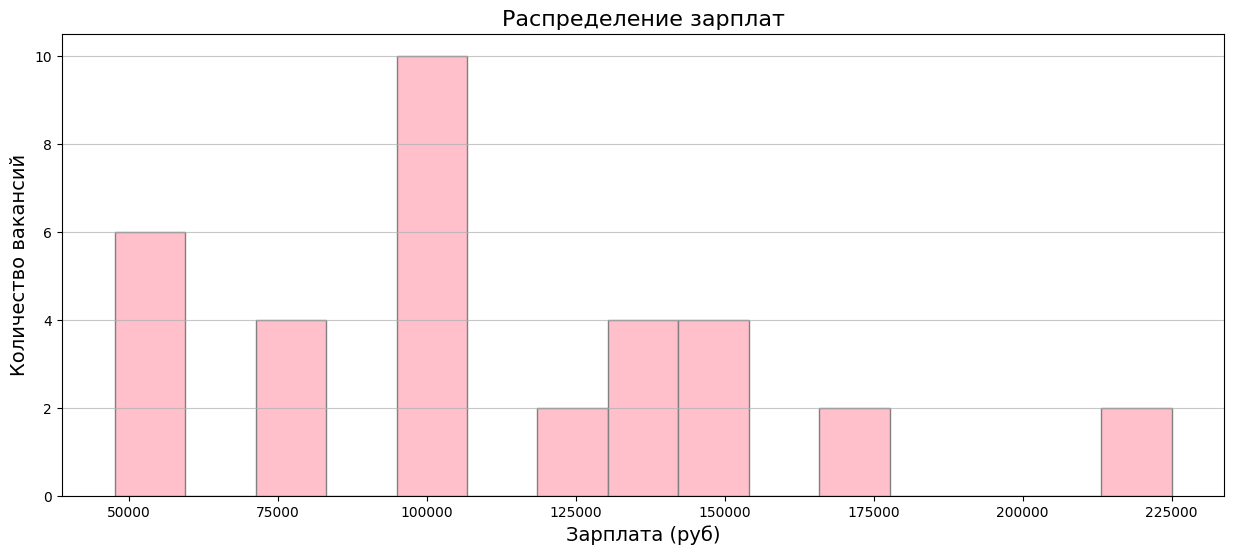

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 6))
plt.hist(salaries, bins=15, color='pink', edgecolor='gray', alpha=1)

plt.title('Распределение зарплат', fontsize=16)
plt.xlabel('Зарплата (руб)', fontsize=14)
plt.ylabel('Количество вакансий', fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

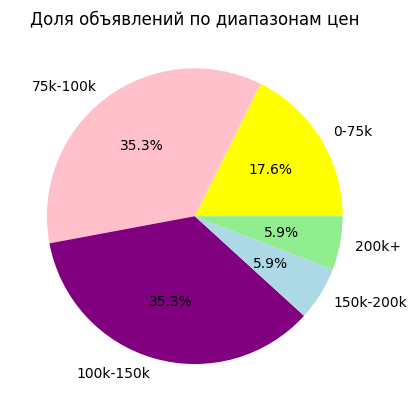

In [5]:
salaries_ranges = ['0-75k', '75k-100k', '100k-150k', '150k-200k', '200k+']
counts = [
    len([x for x in salaries if x <= 75000]),
    len([x for x in salaries if 75000 < x <= 100000]),
    len([x for x in salaries if 100000 < x <= 150000]),
    len([x for x in salaries if 150000 < x <= 200000]),
    len([x for x in salaries if x > 200000])
]
plt.pie(counts, labels=salaries_ranges, autopct='%1.1f%%', colors=['yellow', 'pink', 'purple', 'lightblue', 'lightgreen']) #из гпт
plt.title('Доля объявлений по диапазонам цен')
plt.show()

In [ ]:
#Вывод: мы будем тратить на спортивного тренера около 100-150k в месяц, это нормлаьная цена для рынка. Если захотим кого-то более опытного, будем тратить от 150k

**Покупка площади (парсинг Авито)**

In [6]:
import requests
from bs4 import BeautifulSoup
import re
#ссылка вручную обработана так, чтобы результаты были только для станций метро, которые нам нужны
url = 'https://www.avito.ru/moskva/kommercheskaya_nedvizhimost/prodam/drugoe-ASgBAgICAkSwCNJWnsMNhtk5?f=ASgBAgECA0SwCNJW8hKg2gGeww2G2TkBRbQTFXsiZnJvbSI6MjAwLCJ0byI6MzAwfQ&metro=4-6-10-11-13-16-18-21-30-32-41-42-45-48-50-52-54-57-60-64-66-72-73-75-79-80-82-90-92-97-99-109-114-116-117-118-122-124-126-134-137-138-139-1006-1007-2001'
response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})  #избегаем ошибки 403, это подсказал GPT
soup = BeautifulSoup(response.content, 'html.parser')

price_elements = soup.find_all('p', {'class':"styles-module-root-s4tZ2 styles-module-size_s-nEvE8 styles-module-size_s-PDQal stylesMarningNormal-module-root-_xKyG stylesMarningNormal-module-paragraph-s-HX94M styles-module-noAccent-XIvJm"}) #ищем нужные элементы по классу
weird_prices = [] #список необработанных данных

def process_price(weird_prices_text):
    weird_prices_text = weird_prices_text.replace('\u202f', '').replace('\xa0', '') #приводим текст в божеский вид
    return weird_prices_text
prices =[]
for element in price_elements:
    weird_prices_text = element.get_text()
    processed_price = process_price(weird_prices_text)
    prices.append(processed_price)

print(prices)

['283646₽за м²', '3 дня назад', '57 завершённых объявлений', '283646₽за м²', '3 дня назад', '43 завершённых объявления', '179545₽за м²', '19 августа 2024', '70 завершённых объявлений', '200000₽за м²', 'Вчера', '26 завершённых объявлений', '56682₽за м²', '8 апреля 2024', '362 завершённых объявления', '173643₽за м²', '27 декабря 2024', '26 завершённых объявлений', '294872₽за м²', '24 октября 2024', '570 завершённых объявлений', '298842₽за м²', '9 ноября 2022', '128096₽за м²', '13 февраля 19:01', '418182₽за м²', '12 февраля 03:33', '121489 завершённых объявлений', '225000₽за м²', '1 неделю назад', '89 завершённых объявлений', '243309₽за м²', '20 января 15:16', '12 завершённых объявлений', '77402₽за м²', '28 декабря 2024', '89 завершённых объявлений', '766667₽за м²', '26 ноября 2024', '3149 завершённых объявлений', '1948574₽за м²', '2 недели назад', '1074 завершённых объявления', '97800₽за м²', '20 июля 2023', '50808₽за м²', '27 февраля 2024', '362 завершённых объявления', '21277₽за м²', '

In [7]:
#в список prices попадает очень много мусора, который я не смогла убрать с помощью более точного поиска, поэтому просто отдельно обрабатывает список
prices_per_sqeare = [price for price in prices if "м²" in price]

cleaned_prices = []
for price in prices_per_sqeare: #убирает лишнее и оставляет только число - стоимость аренды за м²
    numbers = re.findall(r'\d+', price.replace(' ', ''))
    cleaned_price = int(numbers[0])
    cleaned_prices.append(cleaned_price)
print(cleaned_prices)

[283646, 283646, 179545, 200000, 56682, 173643, 294872, 298842, 128096, 418182, 225000, 243309, 77402, 766667, 1948574, 97800, 50808, 21277, 98425, 325150, 185777, 323655, 162698, 105960, 306306, 218978, 672430, 54403, 149947, 184418, 276000, 52083, 341667, 555556, 110345, 234899, 265444, 625857, 228856, 64378, 500000, 360000, 330739, 313653, 383199, 191720, 77678, 443801, 170543, 148077]


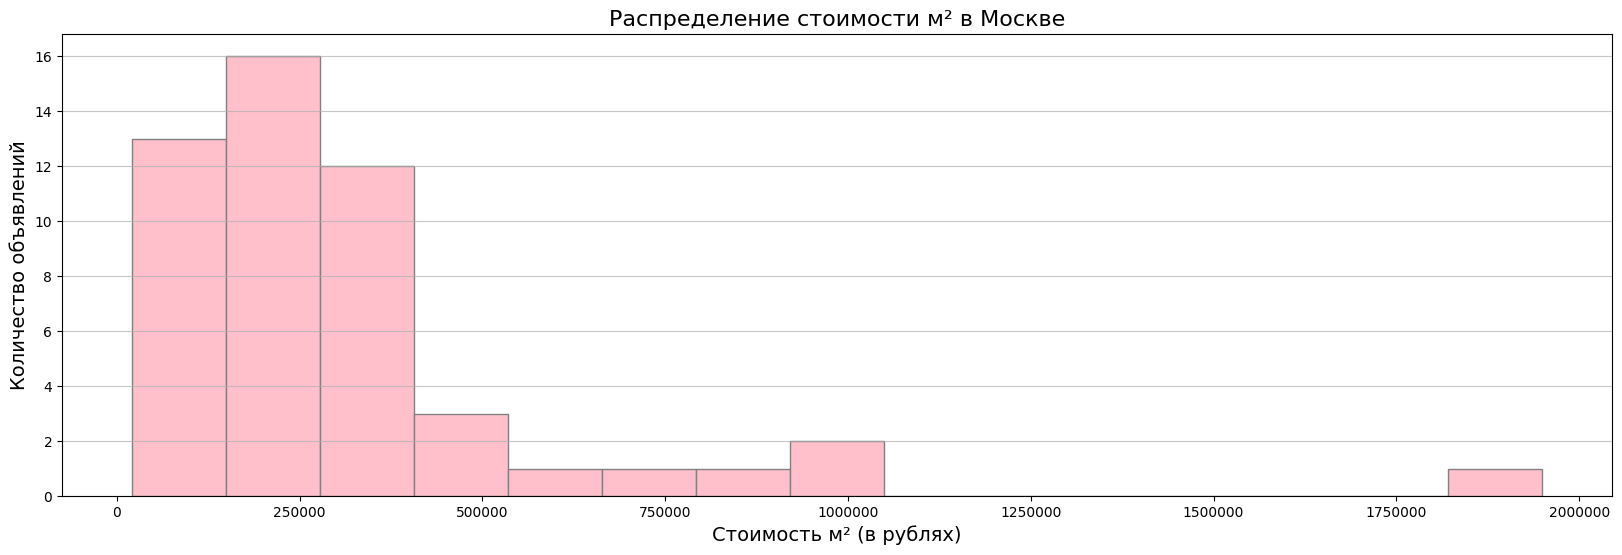

In [8]:
#не всегда авито давал возможность парсинга, поэтому для того, чтобы график точно всегда работал, я добавила в него спаршенные в какую-то из сессий числа 🙏🏻
cleaned_prices = [200000, 330739, 173643, 294872, 179545, 56682, 128096, 225000, 243309, 77402, 283646, 283646, 1948574, 50808, 21277, 98425, 323655, 185777, 105960, 218978, 306306, 672430, 54403, 149947, 184418, 276000, 52083, 555556, 341667, 234899, 265444, 360000, 228856, 64378, 500000, 418182, 313653, 191720, 77678, 97800, 443801, 170543, 1048951, 148077, 400000, 350000, 965724, 197067, 817499, 373320]
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 6))
plt.hist(cleaned_prices, bins=15, color='pink', edgecolor='gray', alpha=1)

plt.title('Распределение стоимости м² в Москве', fontsize=16)
plt.xlabel('Стоимость м² (в рублях)', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.ticklabel_format(axis='x', style='plain')

plt.show()

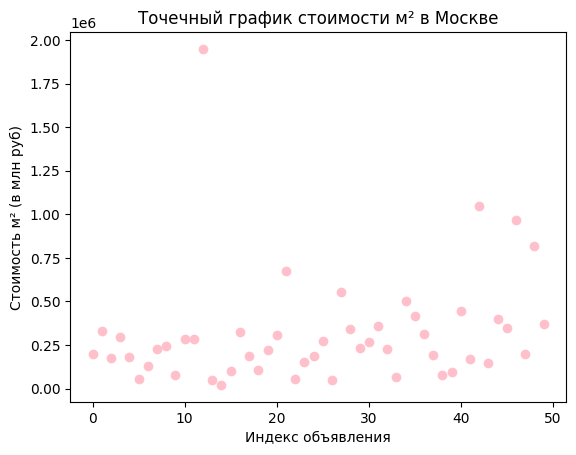

In [9]:
import seaborn as sns
plt.scatter(range(len(cleaned_prices)), cleaned_prices, color='pink', alpha=1)
plt.title('Точечный график стоимости м² в Москве')
plt.xlabel('Индекс объявления')
plt.ylabel('Стоимость м² (в млн руб)')
plt.show()

In [ ]:
#Вывод: аренда одного м² в Москве в нужных нам местах обойдется скорее всего в 250000 рублей

In [2]:
pip install dash-bootstrap-components

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.5 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=06187b77476de79c1054817edacabdec15db0ee6dfa88a9d63027498d03be431
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [10]:
!pip install dash plotly numpy pyngrok

In [11]:
from dash import Dash, html, dcc
import plotly.express as px
import numpy as np
from pyngrok import ngrok
import plotly.graph_objects as go
import dash_bootstrap_components as dbc

#в построении графиков помогал gpt

cleaned_prices = [200000, 330739, 173643, 294872, 179545, 56682, 128096, 225000, 243309, 77402, 283646, 283646, 1948574, 50808, 21277, 98425, 323655, 185777, 105960, 218978, 306306, 672430, 54403, 149947, 184418, 276000, 52083, 555556, 341667, 234899, 265444, 360000, 228856, 64378, 500000, 418182, 313653, 191720, 77678, 97800, 443801, 170543, 1048951, 148077, 400000, 350000, 965724, 197067, 817499, 373320]

graph_title = 'Распределение стоимости м² в Москве'
graph_title2 = 'Распределение зарплат'

fig1 = px.histogram(
    x=cleaned_prices,
    nbins=15,
    title=graph_title,
    labels={'x': 'Стоимость м² (в рублях)', 'y': 'Количество объявлений'},
    color_discrete_sequence=['pink']
)

fig2 = px.histogram(
    x=salaries,
    nbins=15,
    title=graph_title2,
    labels={'x': 'Зарплата (руб)', 'y': 'Количество вакансий'},
    color_discrete_sequence=['lightblue']
)
fig3 = go.Figure()
fig3.add_trace(go.Scatter(
    x=list(range(len(cleaned_prices))),
    y=cleaned_prices,
    mode='markers',
    marker=dict(color='pink', size=8),
    name='Стоимость м² в Москве'
))
fig3.update_layout(
    title='Точечный график стоимости м² в Москве',
    xaxis_title='Индекс объявления',
    yaxis_title='Стоимость м² (руб)'
)

fig1.update_layout(
    yaxis_title='Количество объявлений' #почему-то у этих графиков не было названия оси ординат
)
fig2.update_layout(
    yaxis_title='Количество вакансий'
)
salaries_ranges = ['0-75k', '75k-100k', '100k-150k', '150k-200k', '200k+']
counts = [
    len([x for x in salaries if x <= 75000]),
    len([x for x in salaries if 75000 < x <= 100000]),
    len([x for x in salaries if 100000 < x <= 150000]),
    len([x for x in salaries if 150000 < x <= 200000]),
    len([x for x in salaries if x > 200000])
]
fig4 = go.Figure()
fig4.add_trace(go.Pie(
    labels=salaries_ranges,
    values=counts,
    hole=0.3,
    marker=dict(colors=['yellow', 'pink', 'purple', 'lightblue', 'green']),
    textinfo='percent',
    hoverinfo='label+value'
))
fig4.update_layout(
    title='Доля объявлений по диапазонам зарплат'
)

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
    html.H1("Анализ затрат", style={'textAlign': 'center'}),
    dbc.Row([
        dbc.Col([
            html.H2("Анализ зарплат", style={'textAlign': 'center'}),
            dcc.Graph(figure=fig2),
            dcc.Graph(figure=fig4)
        ], width=6),
        dbc.Col([
            html.H2("Анализ стоимости м² в Москве", style={'textAlign': 'center'}),
            dcc.Graph(figure=fig1),
            dcc.Graph(figure=fig3)
        ], width=6)
    ])
])
if __name__ == '__main__':
    ngrok.set_auth_token("2ubCBYlu3QOM48C92dFhRTdEOMY_3pYTH4G79jgpB9KB6yz6k")  #без ngrok ничего не запускалось даже по коду, идентичному коду из лекции. Зарегистрировалась на этом сайте и использовала его бесплатную версию
    app.run(host='0.0.0.0', port=8050)
    public_url = ngrok.connect(addr=8050, proto="http")
    print("Публичный URL:", public_url)

#теперь по NgrokTunnel можно посмотреть доску вне коллаба

<IPython.core.display.Javascript object>

Публичный URL: NgrokTunnel: "https://e543-35-229-73-121.ngrok-free.app" -> "http://localhost:8050"


In [12]:
from pyngrok import ngrok

#бесплатно только 3 туннеля, поэтому я периодически их удаляла
tunnels = ngrok.get_tunnels()
ngrok.kill()